In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.integrate import odeint  
from scipy.optimize import root

## Aufgabe: FitzHugh-Nagumo

Das FitzHugh-Nagumo-Modell ist ein modelliert das Verhalten eines Neurons bei der Erzeugung eines Aktionspotentials. Das Modell ist durch folgende Gleichungen beschrieben:

$$
\dfrac{dv}{dt} = v - \dfrac{1}{3} v^3- w + i
$$

$$
\tau \dfrac{dw}{dt} = v + a  - b \cdot w
$$


1. Überprüfen, ob die DGL autonom und erster Ordnung ist.
2. Ermitteln Sie die abhängigen Variablen und die unabhängige Variable.
3. Charakterisieren der DGL (Linearität, Homogenität)
4. Bringen Sie die DGL in ihre dynamische Form $\dfrac{d}{dt} (x,y)^T = (f_1(x,y),f_2(x,y)^T$.
5. Visualisieren der Funktion $(f_1(x,y),f_2(x,y)^T$ als Vektorfeld im Phasenraum für den Fall a=0.7, b=0.8, $\tau=12.5$ und i=0.
6. Bestimmen der Fixpunkte: Berechnen Sie die beiden Nullklinen und finden Sie die Fixpunkte als Schnittpunkte der Nullklinen für allgemeine Parameter a,b,i,$\tau$. 
Visualsieren der Nullklinen im Phasenraum für den Fall a=0.7, b=0.8, $\tau=12.5$ und i=0.
7. Analysieren Sie die Stabilität der Fixpunkte für den Fall a=0.7, b=0.8, $\tau=12.5$ und i=0.
Berechnen Sie dazu die Determinante und Spur der Jakob-Matrix.
8. Bifurkationsanalyse: Verändert sich die Anzahl oder Art der Fixpunkte abhängig vom Bifurkationsparameter i für den Fall a=0.7, b=0.8, $\tau=12.5$?
9. Numerische Lösung der DGL für verschiedene Randbedingungen und Werte des Bifurkationsparameter. Visualisieren Sie die Lösung und den Phasenraum mit Nullklinen für die Parameter a=0.7, b=0.8, $\tau=12.5$ und die drei Fälle i=0,1,2.




### Lösung

***1. Überprüfen, ob die DGL autonom und erster Ordnung ist.***

Das System ist erster Ordnung und autonom falls $i$ konstant ist.

***2. Ermitteln der abhängigen und unabhängigen Variablen.***

$t$ ist unabhängige und $v$ und $w$ sind abhängige Variablen

***3. Charakterisieren der DGL (Linearität, Homogenität)***

Der Term $v^3$ ist nicht-linear. Das System ist also nicht-linear. Homogenität existiert nur für lineare DGLn.

***4. Dynamische Form:***

$$
\dfrac{dv}{dt} = v - \dfrac{1}{3} v^3- w + i = f_1(v,w)
$$

$$
\dfrac{dw}{dt} = \dfrac{1}{\tau} v + \dfrac{a}{\tau}  - \dfrac{b}{\tau} w  = f_2(v,w)
$$

***5. Visualisieren der Funktion $(f_1(v,w),f_2(v,w)^T$ als Vektorfeld (Phasenraum).***

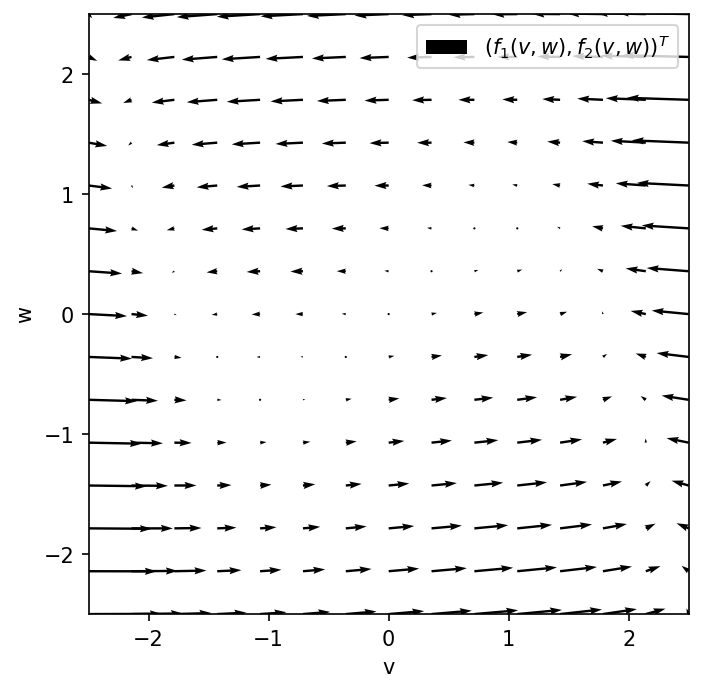

In [3]:
a, b, tau, i = 0.7, 0.8, 12.5, 0.05

def f_1(v,w):
    return v - v**3 / 3. - w + i

def f_2(v,w):
    return v / tau + a / tau - w * b / tau

v_min, v_max = -2.5, 2.5
w_min, w_max = -2.5, 2.5
res_v, res_w = 15, 15
v = np.linspace(v_min, v_max, 1000)
vv,ww = np.meshgrid(np.linspace(v_min,v_max,res_v),
          np.linspace(w_min,w_max,res_w))
dvdt, dwdt = f_1(vv,ww), f_2(vv,ww)


fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0.15,0.15,.8,.8])
ax.quiver(vv,ww,dvdt,dwdt, label=r'$(f_1(v,w),f_2(v,w))^T$')
ax.set_ylim(v_min, v_max)
ax.set_xlim(w_min, w_max)
ax.set_xlabel('v')
ax.set_ylabel('w')
ax.legend()
plt.show()

***6. Bestimmen der Fixpunkte:***

Die beiden Nullklinen $w_1(v)$ und $w_2(v)$ sind:

\begin{align*}
w_1(v) = v - \dfrac{v^3}{3} + i \\
w_2(v) = \dfrac{v+a}{b}
\end{align*}

Die Schnittpunkte ergeben sich aus $w_1(v) = w_2(v)$

$$ - \dfrac{v^3}{3} + \left(1-\dfrac{1}{b}\right)v + i -\dfrac{a}{b} =  0$$

Die Gleichung lässt ich im Allgemeinen numerisch lösen.

In [4]:
a, b, tau, i = 0.7, 0.8, 12.5, 0.05

def f_1(v,w):
    return v - v**3 / 3. - w + i

def f_2(v,w):
    return v / tau + a / tau - w * b / tau

def nullcline_f1(v):
    return v - v**3/3. + i
    
def nullcline_f2(v):
    return (v + a)/b

# find root of this function to identify fixpoint
fp_function = lambda v: nullcline_f1(v) - nullcline_f2(v)

In [5]:
# find position of fixpoint
# x0: initial guess, choose close to fixpoint

x0 = 0.
opt = root(fp_function, x0=0.)
v_fp = opt.x[0]
w_fp = nullcline_f1(v_fp)
fp = [v_fp, w_fp]
print('Fixpunkt:', fp)

Fixpunkt: [-1.1691526098342846, -0.5864407622929521]


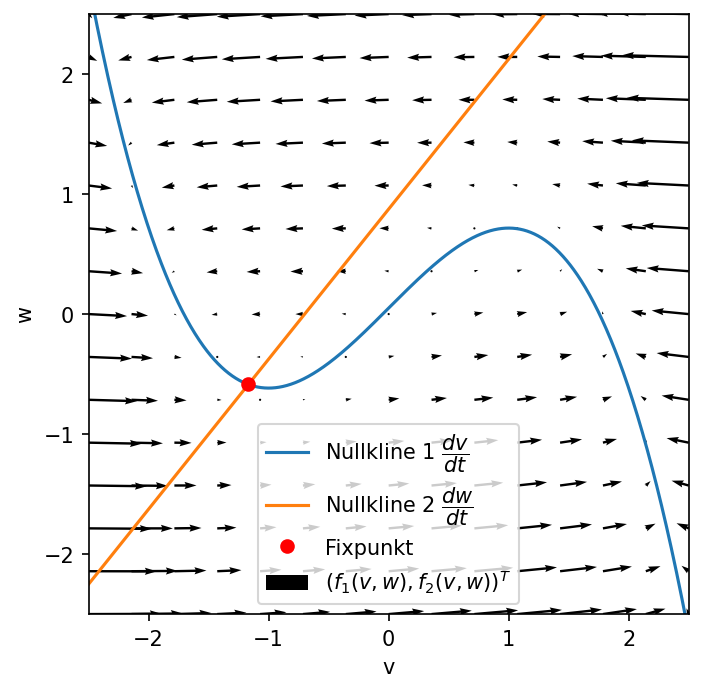

In [7]:
v_min, v_max = -2.5, 2.5
w_min, w_max = -2.5, 2.5
res_v, res_w = 15, 15
v = np.linspace(v_min, v_max, 1000)
vv,ww = np.meshgrid(np.linspace(v_min,v_max,res_v),
          np.linspace(w_min,w_max,res_w))
dvdt, dwdt = f_1(vv,ww), f_2(vv,ww)


fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0.15,0.15,.8,.8])
ax.quiver(vv,ww,dvdt,dwdt, label=r'$(f_1(v,w),f_2(v,w))^T$')
ax.plot(v,nullcline_f1(v), label=r'Nullkline 1 $\dfrac{dv}{dt}$')
ax.plot(v,nullcline_f2(v), label=r'Nullkline 2 $\dfrac{dw}{dt}$')
ax.plot(*fp, 'ro', label='Fixpunkt')
ax.set_ylim(v_min, v_max)
ax.set_xlim(w_min, w_max)
ax.set_xlabel('v')
ax.set_ylabel('w')
ax.legend()
plt.show()

***7. Stabilität der Fixpunkte***

Die Jakobi-Matrix ist:
$$
J=  
\begin{pmatrix}
1-v^2 & -1\\
\tau^{-1} & -b \tau^{-1}.
\end{pmatrix}
$$

Die Determinante der Jakobi-Matrix ergibt sich zu:

$$
\det(J) = -\dfrac{b}{\tau}\left(1-v^2\right)+ \dfrac{1}{\tau}=
\dfrac{1}{\tau}\left(1+b(v^2-1)\right) .
$$

Spur der Jakobi-Matrix
$$
\text{trace}(J) = 1- v^2 - \dfrac{b}{\tau}
$$

In [8]:
def get_jacobian(fp):
    v,w = fp
    jac = np.array([
        [1-v**2, -1],
        [1./tau, -b/tau]
    ])
    return jac

In [9]:
# analyse stability of fixpoint
print('Stabilitätsanalyse am Fixpunkt: ', fp)

print('\nJakobi-Matrix: ', get_jacobian(fp))

print('\nEigenwerte und Eigenvektoren:',linalg.eig(get_jacobian(fp)))

print('\nDeterminante',linalg.det(get_jacobian(fp)))

print('\nSpur',np.trace(get_jacobian(fp)))

Stabilitätsanalyse am Fixpunkt:  [-1.1691526098342846, -0.5864407622929521]

Jakobi-Matrix:  [[-0.36691783 -1.        ]
 [ 0.08       -0.064     ]]

Eigenwerte und Eigenvektoren: (array([-0.21545891+0.23887276j, -0.21545891-0.23887276j]), array([[ 0.96225045+0.j        ,  0.96225045-0.j        ],
       [-0.14574141-0.22985543j, -0.14574141+0.22985543j]]))

Determinante 0.1034827408052684

Spur -0.43091782508231885


***8. Verändert sich die Anzahl oder Art der Fixpunkte abhängig vom Bifurkationsparameter i?***

Für den Fall a=0.7, b=0.8, $\tau=12.5$ gilt auf jeden Fall $\det(J)>0$. Allerdings kann die Spur $\text{trace}(J)$ ihr Vorzeichen wechseln. Der kritische Wert für $v$ ist dabei:
$v_c = \pm \sqrt{1-b/ \tau}$

Diesen Wert setzen wir in unsere Gleichung 
$$ - \dfrac{v^3}{3} + \left(1-\dfrac{1}{b}\right)v + i -\dfrac{a}{b} =  0$$ ein, die den Schnittpunkt der Nullklinen definiert und finden:
$$ i_{c+} \approx 1.419 $$ oder
$$ i_{c-} \approx 0.331$$

In [10]:
v_c1 = np.sqrt(1-b/tau)
v_c2 = -np.sqrt(1-b/tau)
i_c1 = v_c1**3/3 - (1-1/b)*v_c1 + a/b
i_c2 = v_c2**3/3 - (1-1/b)*v_c2 + a/b
i_c1, i_c2

(1.418718662545254, 0.33128133745474575)

***9. Lösung der DGL***

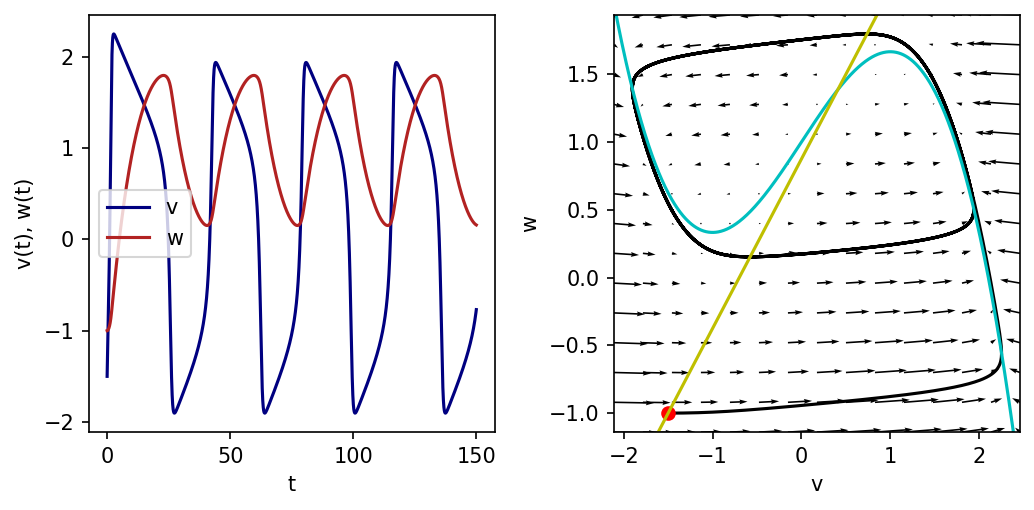

In [2]:
from AutoSys2D import FitzHugh_Nagumo

FHN_std_parameters = {'a': 0.7, 
                      'b': 0.8,
                      'tau': 12.5,
                      'i': 1
}
FHN_cell = FitzHugh_Nagumo(x0=-1.5, y0=-1., parameters=FHN_std_parameters, run_time=150)
FHN_cell.run()

<IPython.core.display.Javascript object>


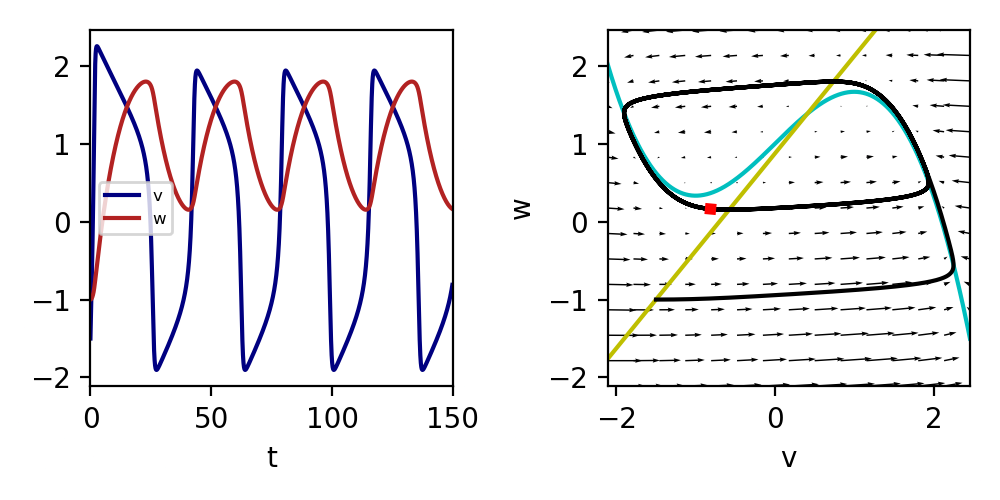

In [3]:
%matplotlib notebook
FHN_cell.notebook_animation(equal_range=True)

<IPython.core.display.Javascript object>


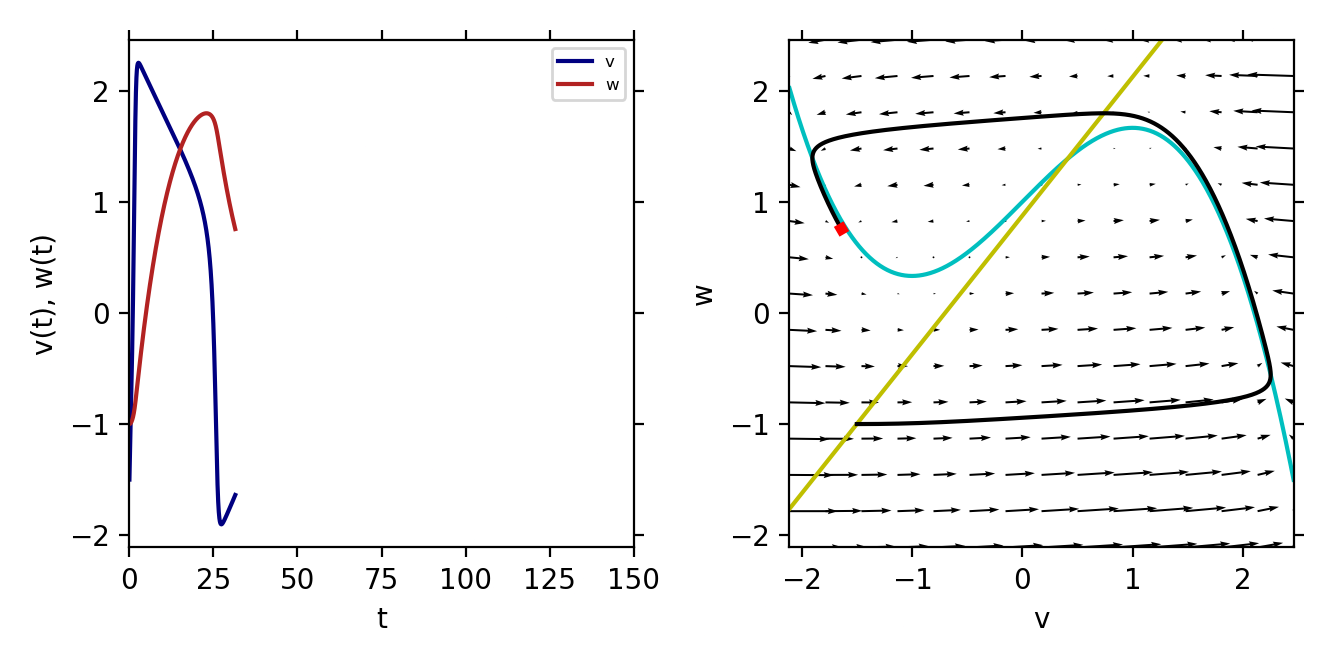

frame 0  of  100
frame 0  of  100
frame 1  of  100
frame 2  of  100
frame 3  of  100
frame 4  of  100
frame 5  of  100
frame 6  of  100
frame 7  of  100
frame 8  of  100
frame 9  of  100
frame 10  of  100
frame 11  of  100
frame 12  of  100
frame 13  of  100
frame 14  of  100
frame 15  of  100
frame 16  of  100
frame 17  of  100
frame 18  of  100
frame 19  of  100
frame 20  of  100
frame 21  of  100
frame 22  of  100
frame 23  of  100
frame 24  of  100
frame 25  of  100
frame 26  of  100
frame 27  of  100
frame 28  of  100
frame 29  of  100
frame 30  of  100
frame 31  of  100
frame 32  of  100
frame 33  of  100
frame 34  of  100
frame 35  of  100
frame 36  of  100
frame 37  of  100
frame 38  of  100
frame 39  of  100
frame 40  of  100
frame 41  of  100
frame 42  of  100
frame 43  of  100
frame 44  of  100
frame 45  of  100
frame 46  of  100
frame 47  of  100
frame 48  of  100
frame 49  of  100
frame 50  of  100
frame 51  of  100
frame 52  of  100
frame 53  of  100
frame 54  of  100
fra

In [4]:
video = FHN_cell.webapp_animation(equal_range=True,n_frames=100)
vid = video.to_html5_video();

In [5]:
# display video in notebook
from IPython import display 
# embedding for the video 
html = display.HTML(vid) 
  # draw the animation 
display.display(html) 

# Weitere Beispiele in 2D

### Lineares System

$$
\dfrac{dx}{dt}=a x - y
$$

$$
\dfrac{dy}{dt}=\epsilon (b x - y)
$$

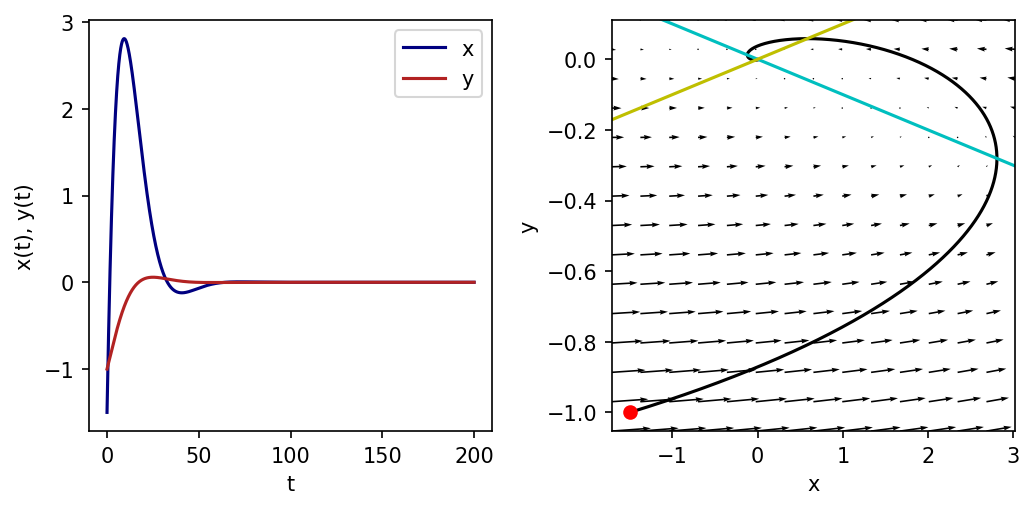

In [10]:
from AutoSys2D import LinearSystem

std_parameters = {'a': -.1, 
                  'b': .1,
                  'eps': .1,
}

linearsystem = LinearSystem(x0=-1.5, y0=-1., parameters=std_parameters, run_time=200, front_end=True)
linearsystem.run()

## Gedämpfter harmonischer Oszillator
Die Gleichung für den gedämften harmonischen Oszillator ist zweiter Ordnung.
$$
\dfrac{d^2}{dt^2} x(t) +  2 \gamma \dfrac{d}{dt} x(t) + \omega^2 x(t) = 0
$$

Wir ersetzen 
$$
y(t) = \dfrac{d}{dt} x(t)
$$

und erhalten 
$$\dfrac{d}{dt} y(t) +  2 \gamma y(t) + \omega^2 x(t) = 0.$$

Nun definieren wir als nächstes
$$
f_1(x,y) = y
$$
und

$$
f_2(x,y) = - 2 \gamma y - \omega^2 x
$$

Somit haben wir die Gleichung des gedämpften harmonischen Oszillators in das folgende dynamische System mit zwei abhängigen Variablen umgeformt. Dies kann nun numerisch gelöst werden.

$$
\dfrac{dx}{dt}=f_1(x,y)
$$

$$
\dfrac{dy}{dt}=f_2(x,y)
$$

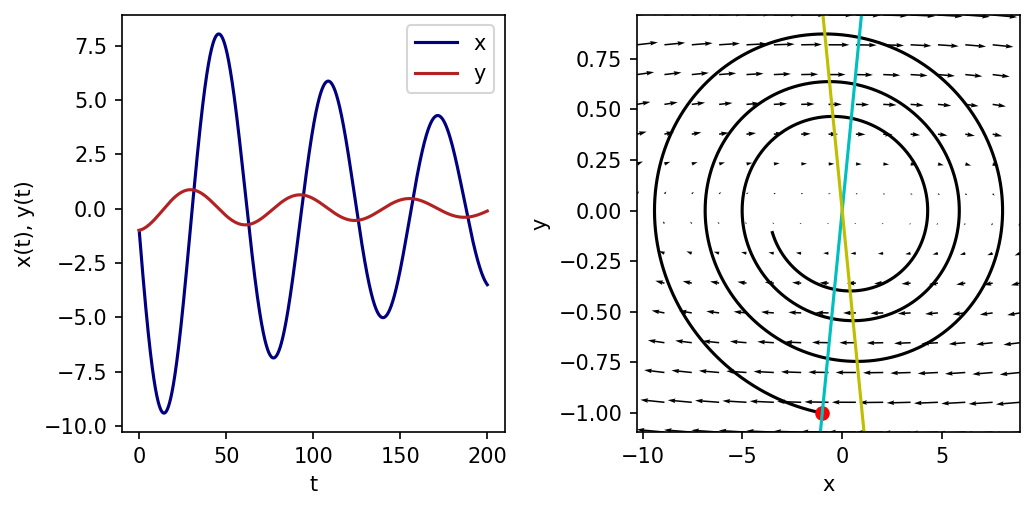

In [10]:
from AutoSys2D import DampedHarmonicOscillator

std_parameters = {'gamma': .005, 
                  'omega': .1,
}

oscillator = DampedHarmonicOscillator(x0=-1., y0=-1., parameters=std_parameters, run_time=200, front_end=True)
oscillator.run()

## Räuber-Beute Systeme, Lotka-Volterra

Ein Räuber-Beute System bestehe aus einer Beutepopulation von der Größe $x$ und einer Räuberpopulation von der Größe $y$. Die effektive pro-Kopf Wachstumsrate (pro-Kopf Wachstumsrate minus Sterberate) der Beutetiere sei $a$, die Verluste durch die Räuber sei $b x y$, der Gewinn der Räuber sei $c x y$ und die effektive pro-Kopf Sterberate (pro-Kopf Sterberate minus Wachstumsrate) der Beutetiere sei $d$. Dies ergibt das folgende nicht-lineare zweidimensional DGL-System:

\begin{align}
\frac{dx}{dt} &= ax-bxy \\
\frac{dy}{dt} &= c x y  - d y 
\end{align}

wobei alle Parameter und Variablen positiv angenommen werden können.

Dieses DGL-System hat eine Erhaltungsgröße E,

\begin{equation}E=cx-d \ln (x) + by-a \ln (y) \end{equation} 

wie folgende Rechnung zeigt:

\begin{align*}
\frac{dE}{dt}
= \frac{dE(x,y)}{dt} 
=& \ \frac{\partial E}{\partial x} \frac{dx}{dt}+
   \frac{\partial E}{\partial y} \frac{dy}{dt} \\ 
=& \ (c-d/x)(ax-bxy)+(b-a/y)/cxy-dy) 
= ... = 0 \\ 
\end{align*}

so dass die Lösungen des Systems entweder periodische Populationszyklen oder die stationäre Lösung (mit $x=d/c$, $y=a/b$) sind.

Führt man eine Taylorentwicklung um die stationäre Lösung durch, so zeigt sich, dass kleine Schwingungen der Populationen durch harmonische Oszillationen beschrieben werden.

***Frage: Besitzt das System einen Fixpunkt?***

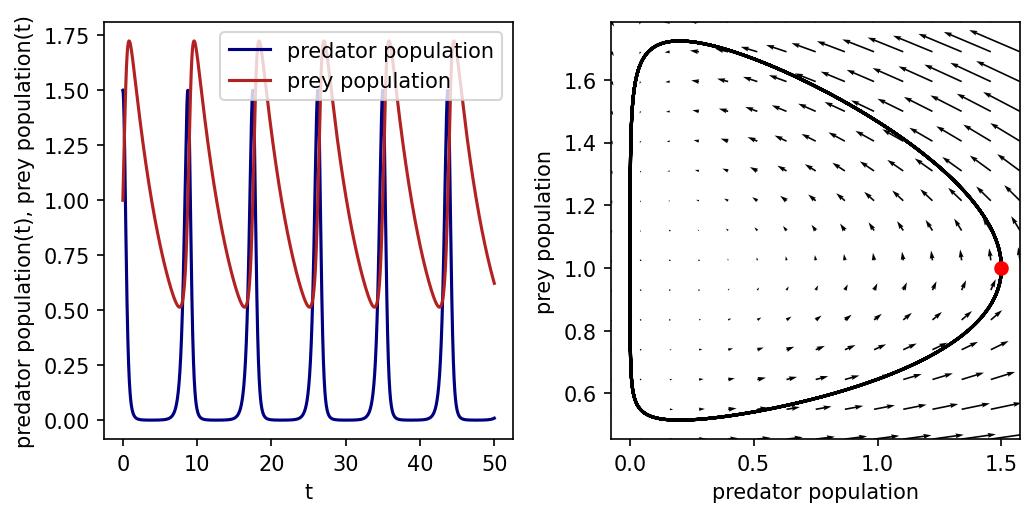

In [11]:
from AutoSys2D import Lotka_volterra

LV_std_parameters = {'a': 5., 
                  'b': 5.,
                  'c': 1.,
                  'd': .2,
                    }

LV_sim = Lotka_volterra(x0=1.5, y0=1., parameters=LV_std_parameters, run_time=50)
LV_sim.run()

frame 0  of  100
frame 0  of  100
frame 1  of  100
frame 2  of  100
frame 3  of  100
frame 4  of  100
frame 5  of  100
frame 6  of  100
frame 7  of  100
frame 8  of  100
frame 9  of  100
frame 10  of  100
frame 11  of  100
frame 12  of  100
frame 13  of  100
frame 14  of  100
frame 15  of  100
frame 16  of  100
frame 17  of  100
frame 18  of  100
frame 19  of  100
frame 20  of  100
frame 21  of  100
frame 22  of  100
frame 23  of  100
frame 24  of  100
frame 25  of  100
frame 26  of  100
frame 27  of  100
frame 28  of  100
frame 29  of  100
frame 30  of  100
frame 31  of  100
frame 32  of  100
frame 33  of  100
frame 34  of  100
frame 35  of  100
frame 36  of  100
frame 37  of  100
frame 38  of  100
frame 39  of  100
frame 40  of  100
frame 41  of  100
frame 42  of  100
frame 43  of  100
frame 44  of  100
frame 45  of  100
frame 46  of  100
frame 47  of  100
frame 48  of  100
frame 49  of  100
frame 50  of  100
frame 51  of  100
frame 52  of  100
frame 53  of  100
frame 54  of  100
fra

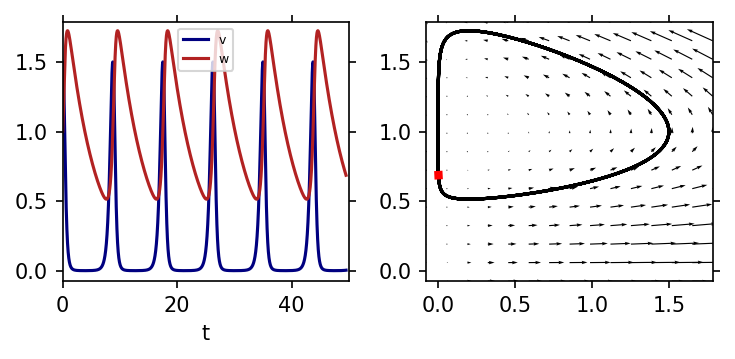

In [12]:
LVvideo = LV_sim.webapp_animation(equal_range=True)
LVvid = LVvideo.to_html5_video();

In [13]:
# display video in notebook
from IPython import display 
# embedding for the video 
LVhtml = display.HTML(LVvid) 
  # draw the animation 
display.display(LVhtml) 

## Genetic Control

A model for a genetic control:
The activity of a gene is
directly induced by two
copies of the protein for which
it codes. The gene is
stimulated by its own
product, which can lead to
autocatalytic feedback
process.
x and y are proportional to
the concentrations of the
protein and the messenger
RNA from which it is
translated, respectively.

$$
\dfrac{dx}{dt}=-ax+y
$$

$$
\dfrac{dy}{dt}=\dfrac{x^2}{1+x^2}-by
$$

a, b > 0 with
bifurkation parameter a.



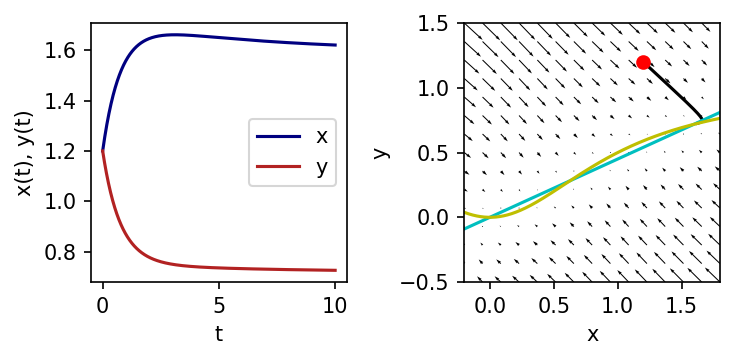

In [5]:
from AutoSys2D import Genetic_control

GC_std_parameters = {'a': .45, 
                     'b':1.
}
GC = Genetic_control(x0=1.2, y0=1.2, parameters=GC_std_parameters, run_time=10)
GC.run()